In [1]:
%matplotlib inline

In [2]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [4]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']
    
    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

In [5]:
def plot_results(filename, Z, Age, other_info = ''):
    data = h5.File(filename)
    SP = data['BSE_System_Parameters']
    SP_df = pd.DataFrame({
                'L1': SP['Luminosity(1)'][()],
                'L2': SP['Luminosity(2)'][()],
                'Teff1': SP['Teff(1)'][()],
                'Teff2': SP['Teff(2)'][()],
                'type1': SP['Stellar_Type(1)'][()],
                'type2': SP['Stellar_Type(2)'][()],
                'Init_SemiMajorAxis': SP['SemiMajorAxis@ZAMS'][()],
                'Merger': SP['Merger'][()],
                'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
                'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
            })
    merger_SP_df = restrict(SP_df, 'Merger', 1, 1)
    MS_merger_SP_df = restrict(restrict(SP_df, 'Merger', 1, 1), 'type1', 0, 1)
    print('Total merger fraction: ', merger_SP_df.shape[0]/SP_df.shape[0])
    print('MS merger fraction: ', MS_merger_SP_df.shape[0]/SP_df.shape[0])


    ax = sns.displot(MS_merger_SP_df, x="Init_SemiMajorAxis") #kind="kde")
    ax.set(xlabel='Semi-major axis at ZAMS (AU)', ylabel='Count', title='Initial distribution of MS mergers')

    MS_merger_SP_df.loc[:, "q"] = MS_merger_SP_df.Mass_ZAMS2 / MS_merger_SP_df.Mass_ZAMS1
    ax = sns.displot(MS_merger_SP_df, x="q") #kind="kde")
    ax.set(xlabel='Mass ratio (M2/M1)', ylabel='Count', title='Initial distribution of MS mergers')


    merger_progenitor = restrict(restrict(SP_df, 'type1', 0, 1), 'type2', 0, 1) 
    plt.figure(figsize=(8,7))
    plt.scatter(merger_progenitor.Teff1, merger_progenitor.L1, label = 'Primary', s = 1)
    plt.scatter(merger_progenitor.Teff2, merger_progenitor.L2, label = 'Secondary', s = 1)
    plt.scatter(MS_merger_SP_df.Teff1, MS_merger_SP_df.L1, label = 'Merger product', s = 1)
    plt.gca().invert_xaxis()
    plt.title('Main Sequence HRD: Z = ' + str(Z) + ', Age (Myr) = '+ str(Age) + other_info)
    plt.xlabel('Effective temperature (K)')
    plt.ylabel('Luminosity (Lsun)')
    plt.yscale('log')
    plt.legend()

    return

print(SP['SemiMajorAxis@ZAMS'].attrs['units'])

Number of systems = 10,000

Total merger fraction:  0.4189
MS merger fraction:  0.095


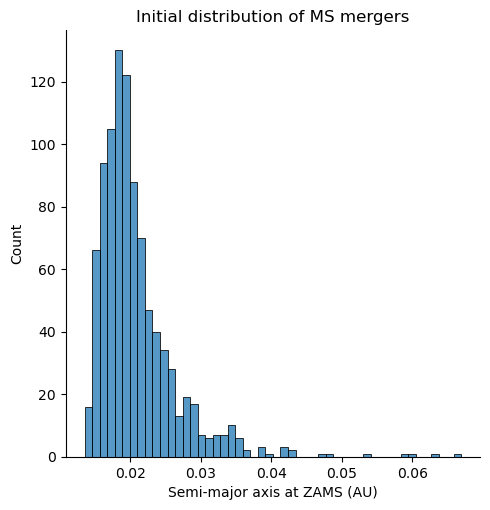

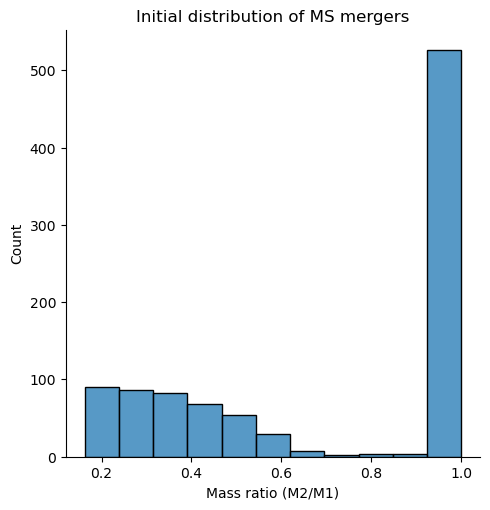

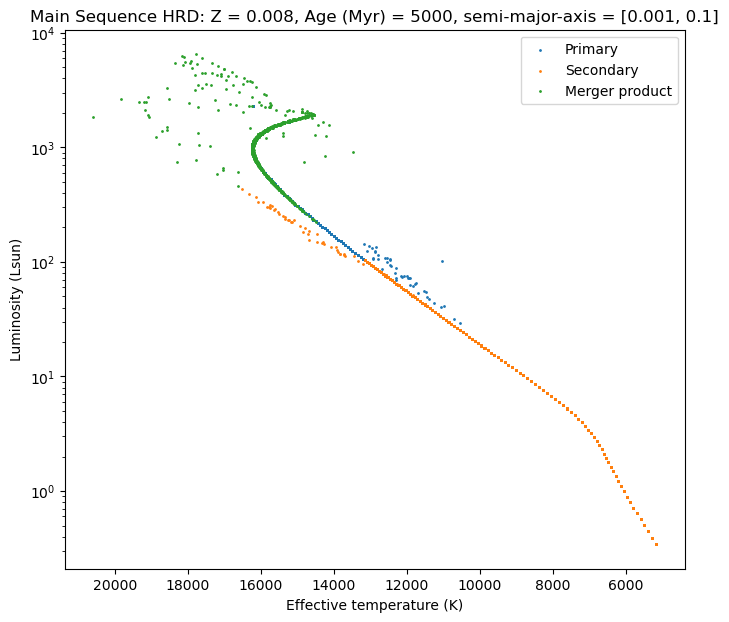

In [6]:
plot_results('COMPAS_Output_M0.8to3to6_80Myr.h5', 0.008, 5000, other_info = ', semi-major-axis = [0.001, 0.1]')

Initial semi-major axis peaks at 0.02 for systems that merge on the MS (excludes non-MS mergers). 
Initial mass ratio peaks just below 1. 
When the initial semi-major axis is controlled, the stars do merge on the MS frequently.

Total merger fraction:  0.001001001001001001
MS merger fraction:  0.0


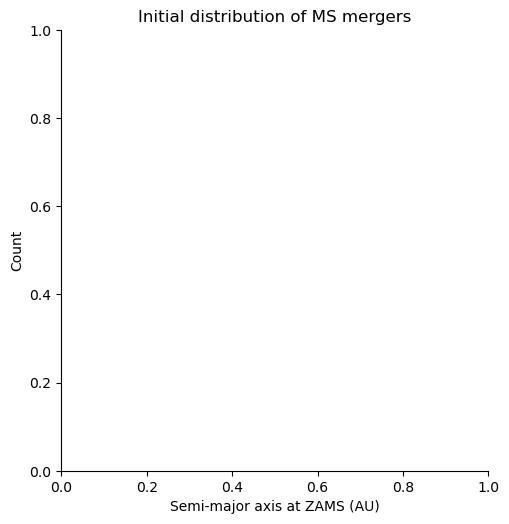

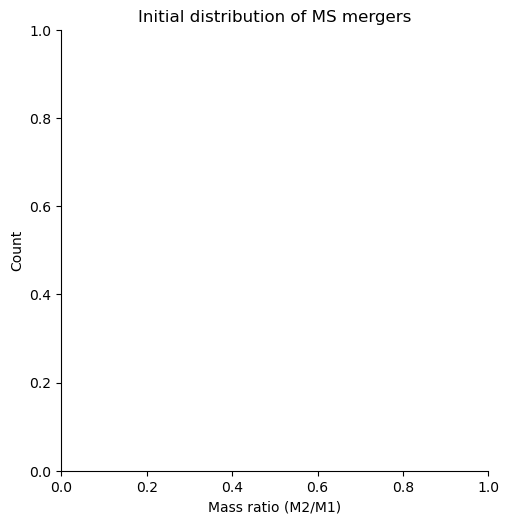

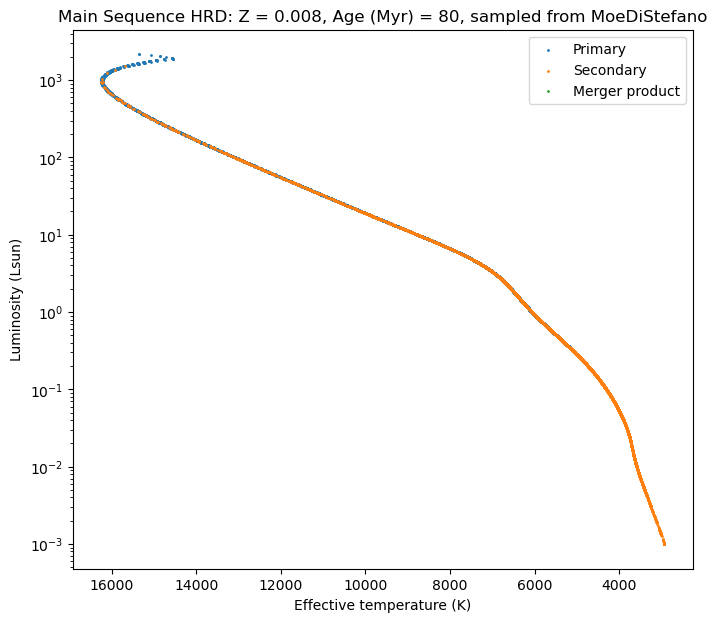

In [7]:
plot_results('COMPAS_Output_sampled.h5', 0.008, 80, other_info = ', sampled from MoeDiStefano')

Total merger fraction:  0.07317317317317318
MS merger fraction:  0.0


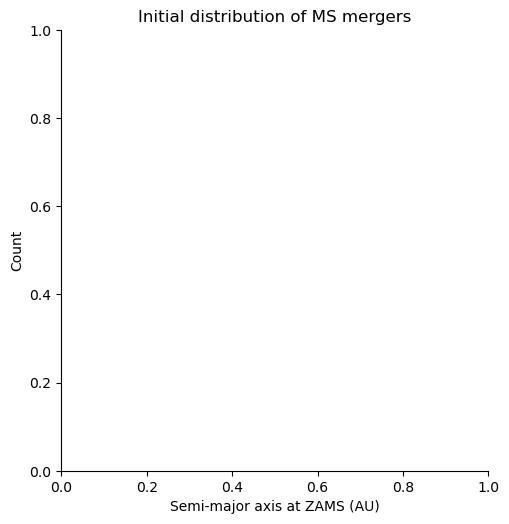

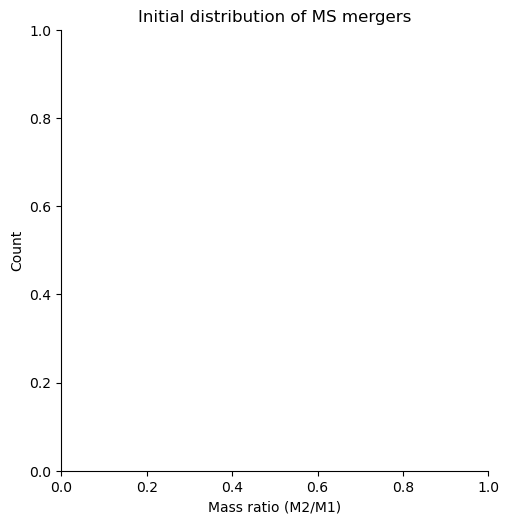

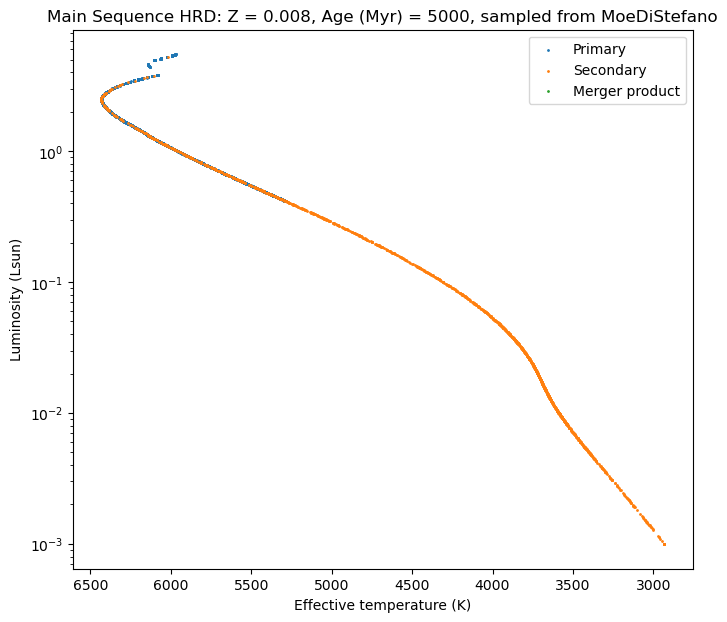

In [8]:
plot_results('COMPAS_Output_sampled_5Gyr.h5', 0.008, 5000, other_info = ', sampled from MoeDiStefano')

Total merger fraction:  0.08308308308308308
MS merger fraction:  0.0


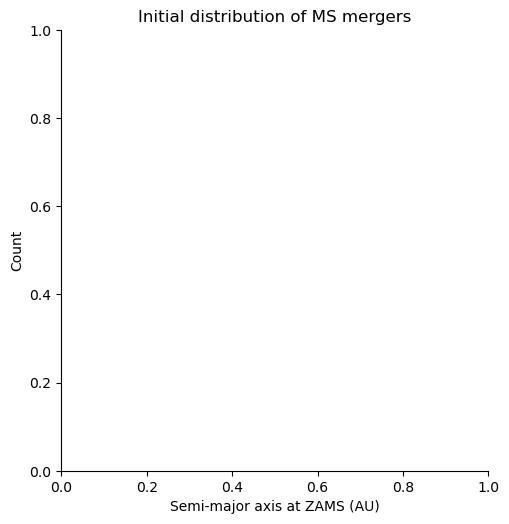

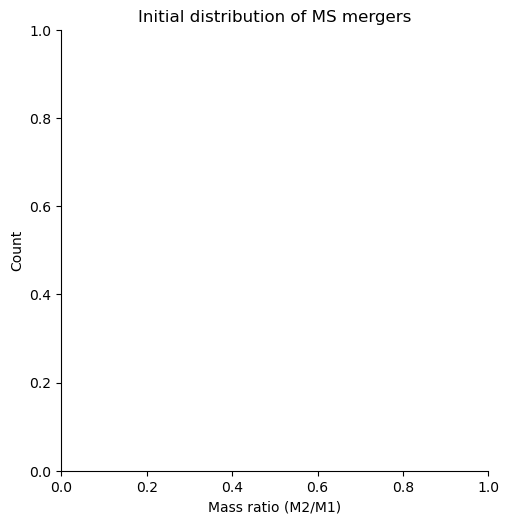

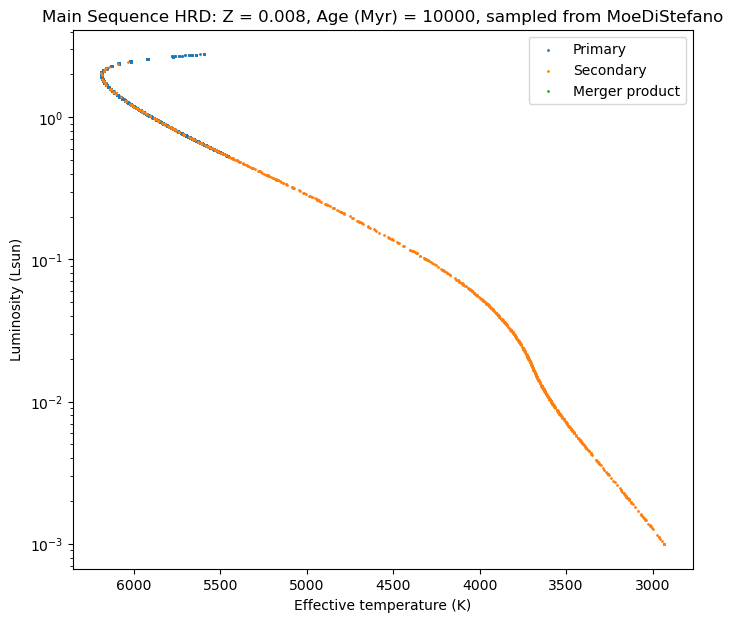

In [9]:
plot_results('COMPAS_Output_sampled_10Gyr.h5', 0.008, 10000, other_info = ', sampled from MoeDiStefano')

When I use the output from the MoeDiStefano sampler as it is, the systems do not merge, up to 10 Gyr simulation time. Most stars have an initial mass or ~ 1-2 Msun. 

Total merger fraction:  0.0672
MS merger fraction:  0.055


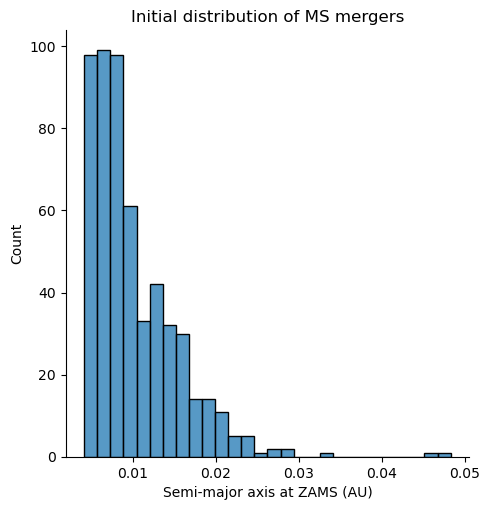

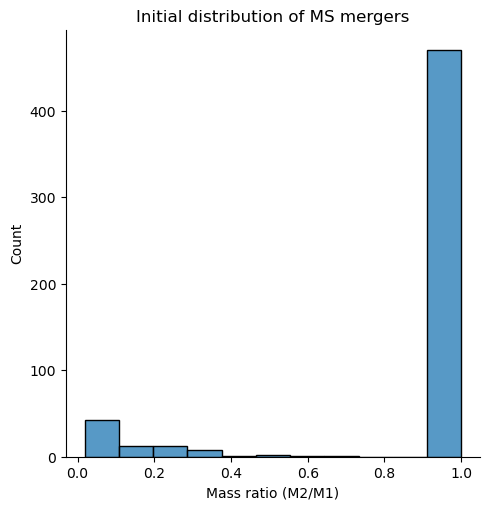

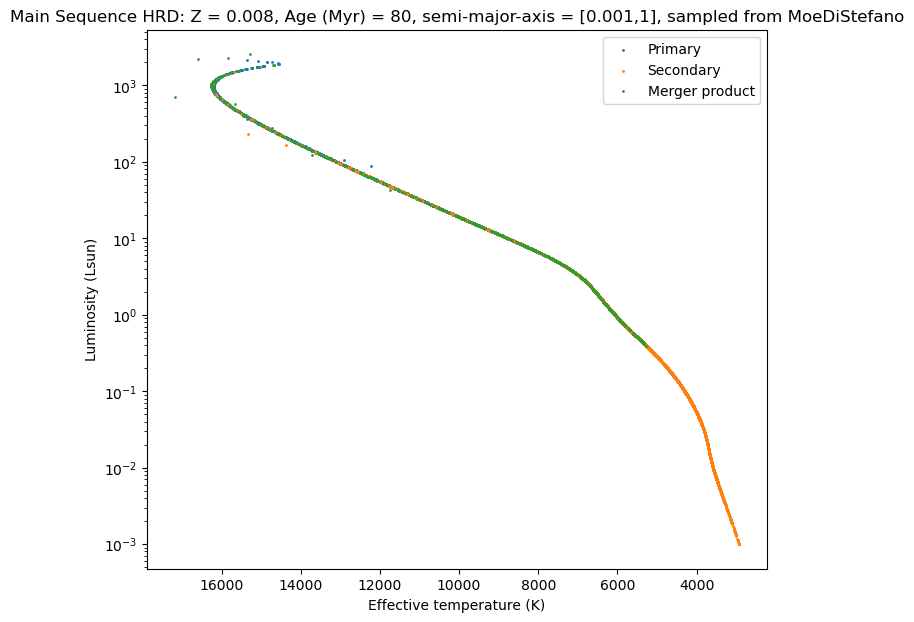

In [10]:
plot_results('COMPAS_Output_sampled_80Myr.h5', 0.008, 80, other_info = ', semi-major-axis = [0.001,1], sampled from MoeDiStefano')

But when I do control the initial semi-major axis (and use the sampled initial masses only, excluding orbital period and eccentricity), the systems do merge and distribution peaks at ~ 0.01 (semi-major axis) and ~ 0.9 (mass ratio).  

Total merger fraction:  0.0443
MS merger fraction:  0.0001


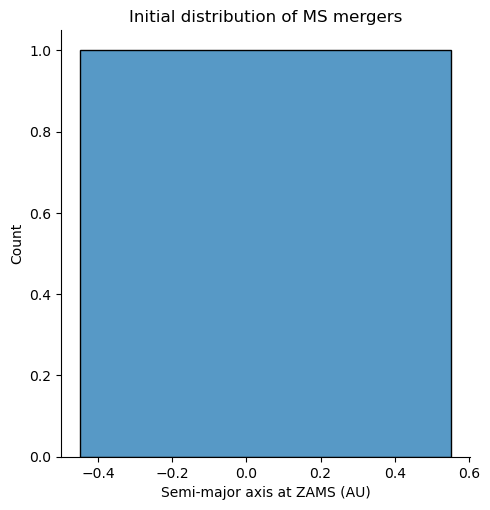

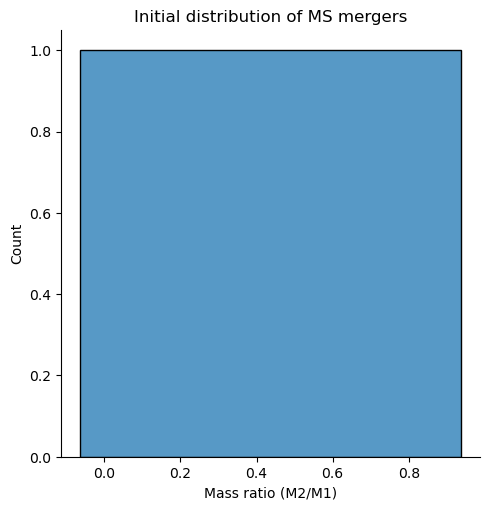

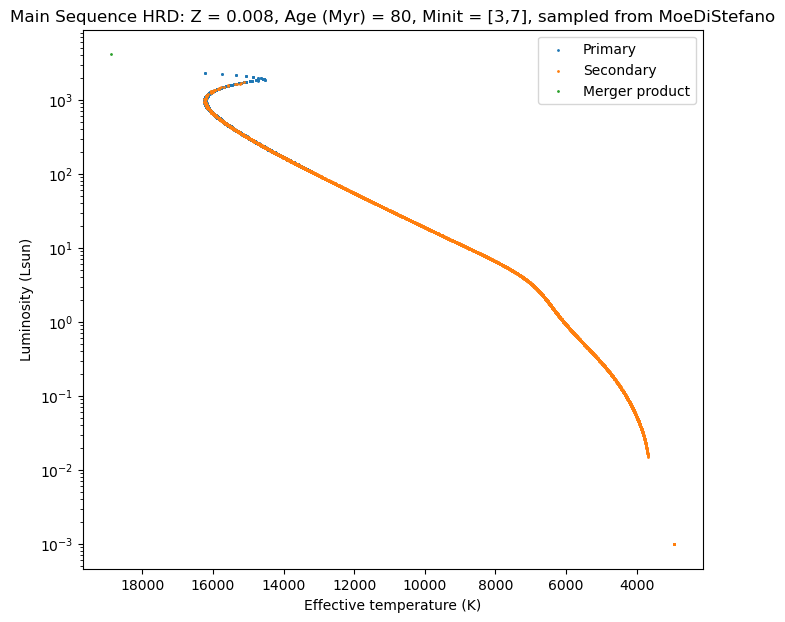

In [11]:
plot_results('COMPAS_Output_sampled_M3to7.h5', 0.008, 80, other_info = ', Minit = [3,7], sampled from MoeDiStefano')

When I restrict the mass range to [3,7] which is +/- 2 from the MSTO mass of 5Msun NGC 1755 (Z = 0.008, ~ 80 Myr old), one of them merge on the MS. The number of systems is still 10,000.

Only 1 out of 10,000 systems merged on MS

Total merger fraction:  0.04778
MS merger fraction:  8e-05


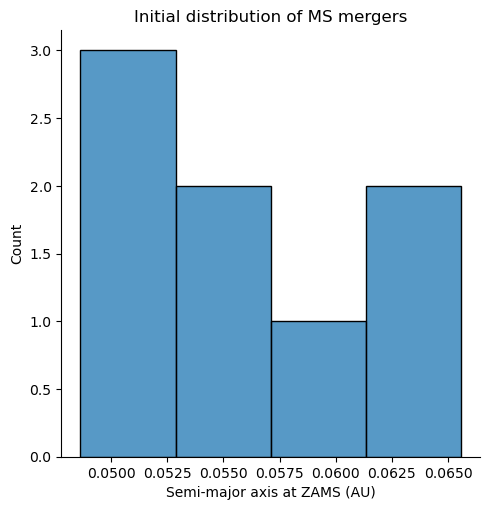

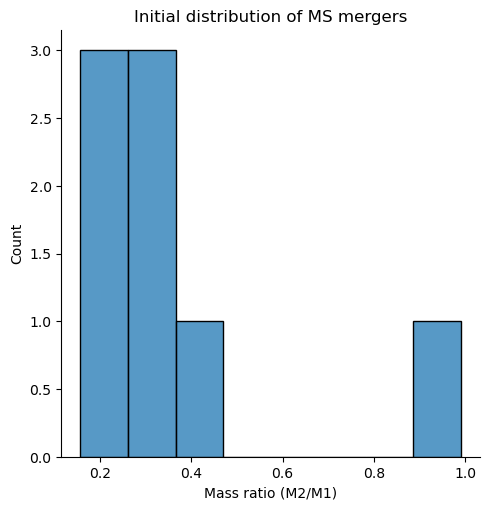

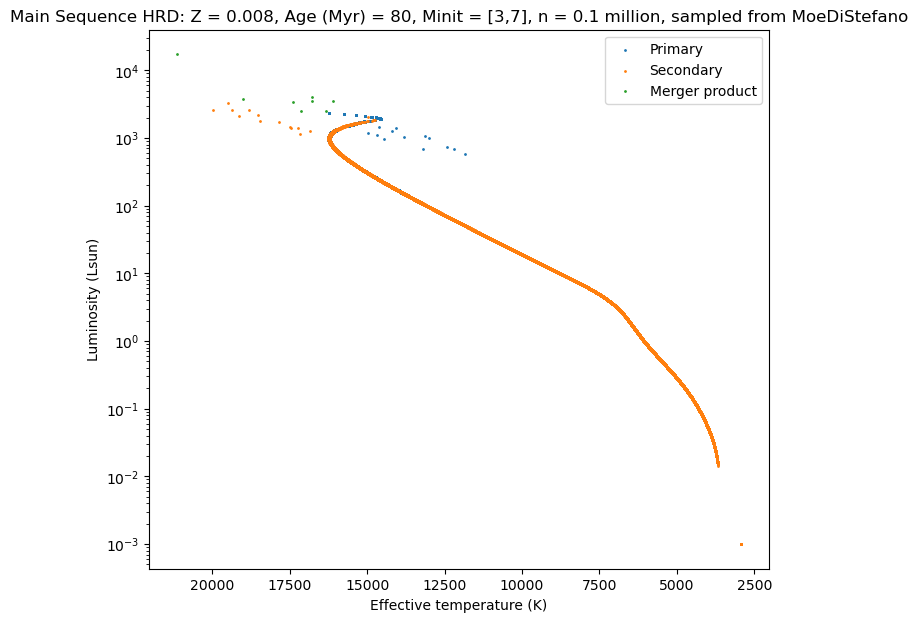

In [12]:
plot_results('COMPAS_Output_sampled_M3to7_0.1mil.h5', 0.008, 80, other_info = ', Minit = [3,7], n = 0.1 million, sampled from MoeDiStefano')

is it a photometric effect, two stars with no mass transfer but twice the luminoisty, threshold for resolving binaries, two close stars appear wider than observed can be observed as single stars

Keeping everything the same as before, if I increase the number of systems to 100,000 we observe more binaries merging on the MS. 